<a href="https://colab.research.google.com/github/s-zhang-cs/PyTorch-Exercises/blob/main/basic_RNN_codealong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From PyTorch for deep learning by Jose Portilla


In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = torch.linspace(0, 799, 800)
x

tensor([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
         24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
         36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
         60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
         84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
        108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
        120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 14

In [4]:
y = torch.sin(x*3.1416/20)


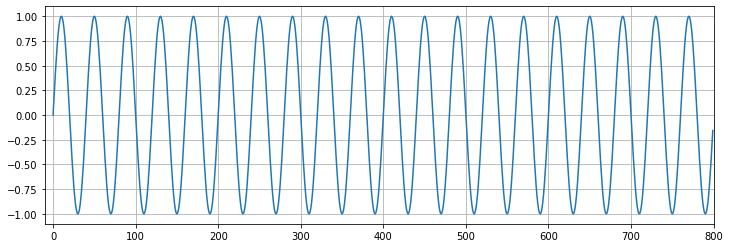

In [5]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [6]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

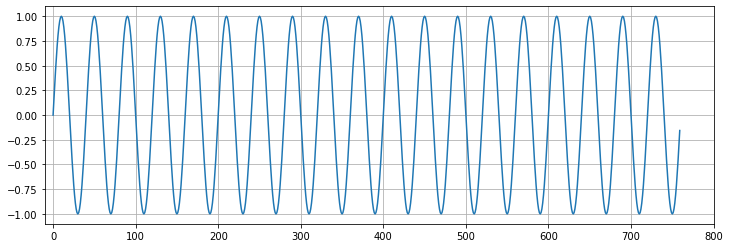

In [7]:
plt.figure(figsize=(12,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

In [8]:
def input_data(seq, ws):
  out = [] # ([0,1,2,3], [4]), ([1,2,3,4], [5]) ....
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1] # predict 1 point into the future
    out.append((window, label))

  return out

In [16]:
window_size = 40
train_data = input_data(train_set, window_size)

# train_data = input_data([1,2,3,4,5,6], 2)

In [17]:
len(train_data) # 760 - 40

720

In [18]:
train_data

[(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
           7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
           1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
           7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
          -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
          -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
          -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
          -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
  tensor([1.4480e-05])),
 (tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
           8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
           9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
           5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
          -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01

In [51]:
torch.manual_seed(42)
model = LSTM(1, 50, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-1)

In [52]:
class LSTM(nn.Module):

  def __init__(self, input_size, hidden_size, out_size):
    super().__init__()
    self.hidden_size = hidden_size

    self.lstm = nn.LSTM(input_size, hidden_size)
    self.linear = nn.Linear(hidden_size, out_size)
    # (H, C)
    self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))

  def forward(self,seq):
    
    # LSTM Inputs: input, (h_0, c_0)
    # input.shape = (sequence length, batch size, input size)
    # h_0.shape = (num_layers, batch size, hidden size)
    # h_c.shape = (num_layers, batch size, hidden size)
    lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)

    pred = self.linear(lstm_out.view(len(seq), -1))

    return pred[-1]


In [53]:
hidden = torch.zeros(1,1,50)
hidden

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]]])

In [68]:
i=0
for seq,y_train in train_data:
  print(seq)
  print(f'sequence length: {len(seq)}')
  print(seq.view(len(seq),1,-1))
  print("------------------------------------")
  lstm = nn.LSTM(1, 50)
  lstm_out, hidden = lstm(seq.view(len(seq), 1, -1), (torch.zeros(1,1,50), torch.zeros(1,1,50)))
  linear = nn.Linear(50, 1)
  pred = linear(lstm_out.view(len(seq), -1))
  print("lstm_out: ")
  print(lstm_out)
  print("lstm_out.view(len(seq), -1)")
  print(lstm_out.view(len(seq), -1))
  print("hidden: ")
  print(hidden)
  print("pred: ")
  print(pred)
  break

tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
         7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
         1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
         7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
        -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
        -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
        -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
        -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01])
sequence length: 40
tensor([[[ 0.0000e+00]],

        [[ 1.5643e-01]],

        [[ 3.0902e-01]],

        [[ 4.5399e-01]],

        [[ 5.8779e-01]],

        [[ 7.0711e-01]],

        [[ 8.0902e-01]],

        [[ 8.9101e-01]],

        [[ 9.5106e-01]],

        [[ 9.8769e-01]],

        [[ 1.0000e+00]],

        [[ 9.8769e-01]],

        [[ 9.5106e-01]],

        [[ 8.9100e-01]],

        [[ 8.0901e-01]],

     

In [69]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [70]:
for p in model.parameters():
  print(p.numel())

200
10000
200
200
50
1


Epoch 0 Loss: 0.00021174414723645896
Performance on test range: 0.0019767028279602528


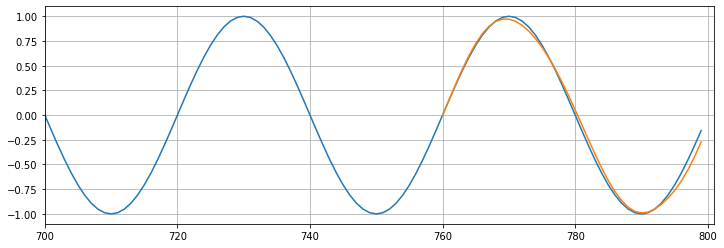

Epoch 1 Loss: 2.557030711614061e-05
Performance on test range: 0.0005176558624953032


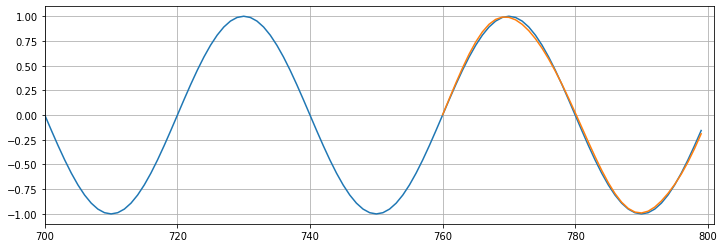

Epoch 2 Loss: 2.037079639194417e-06
Performance on test range: 0.0005483805434778333


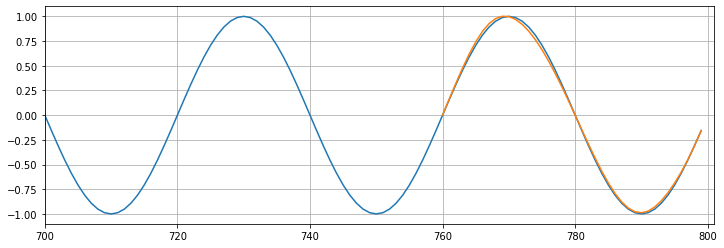

Epoch 3 Loss: 6.080387038309709e-08
Performance on test range: 0.0013704810990020633


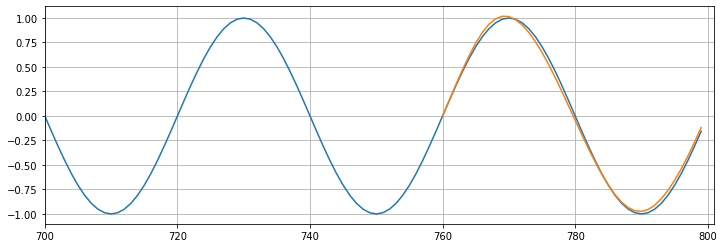

Epoch 4 Loss: 1.376742966385791e-05
Performance on test range: 0.0018329747254028916


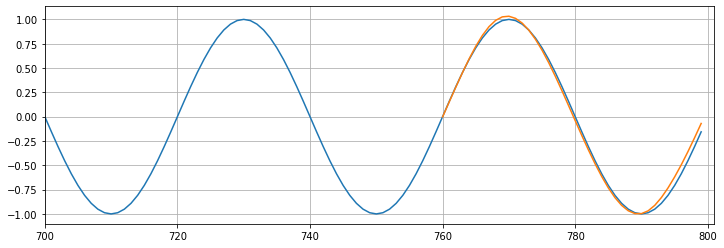

Epoch 5 Loss: 2.295974081789609e-05
Performance on test range: 0.0010043547954410315


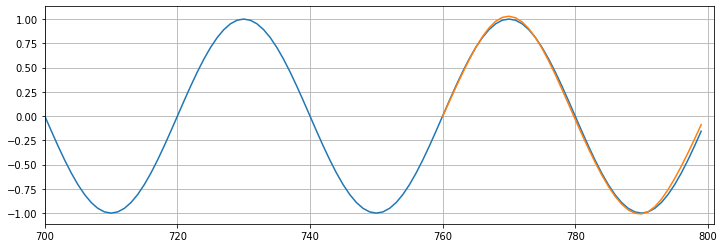

Epoch 6 Loss: 1.7427575585315935e-05
Performance on test range: 0.0004417681193444878


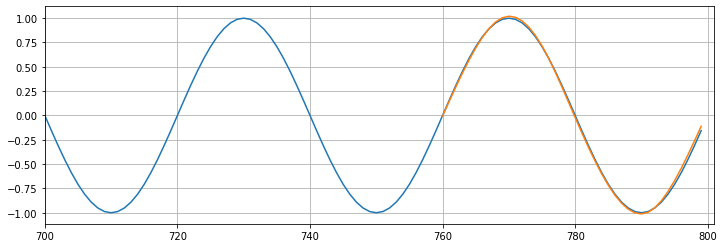

Epoch 7 Loss: 7.421998816425912e-06
Performance on test range: 0.00014430096780415624


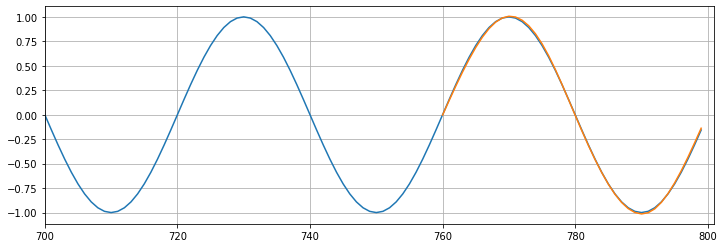

Epoch 8 Loss: 9.505337175141904e-07
Performance on test range: 0.0001163796623586677


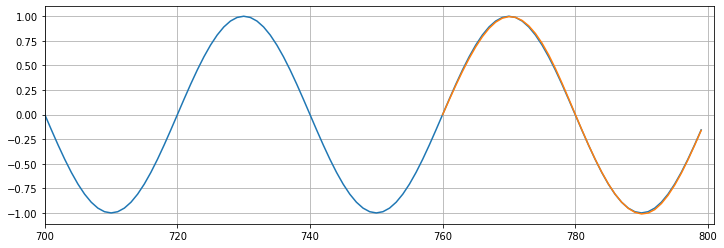

Epoch 9 Loss: 9.486831231697579e-08
Performance on test range: 0.0001770400267560035


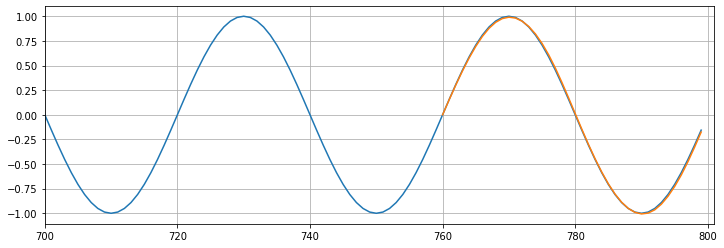

In [71]:
epochs = 10
future = 40

for i in range(epochs):
  for seq,y_train in train_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))

    y_pred = model(seq)

    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

  print(f'Epoch {i} Loss: {loss.item()}')
  preds = train_set[-window_size:].tolist()

  for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
      model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
      preds.append(model(seq).item())

  loss = criterion(torch.tensor(preds[-window_size:]),test_set)
  print(f'Performance on test range: {loss}')

  plt.figure(figsize=(12,4))
  plt.xlim(700,801)
  plt.grid(True)
  plt.plot(y.numpy())
  plt.plot(range(760,800),preds[window_size:])
  plt.show()

In [72]:
epochs = 15
window_size = 40
future = 40

all_data = input_data(y, window_size)
len(all_data)

760

In [73]:
import time
start_time = time.time()

for i in range(epochs):
  for seq,y_train in all_data:
    optimizer.zero_grad()
    model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))

    y_pred = model(seq)

    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()

  print(f'Epoch {i} Loss: {loss.item()}')

total_time = time.time() - start_time
print(total_time / 60)

Epoch 0 Loss: 1.2162777238700073e-06
Epoch 1 Loss: 2.1425814793474274e-06
Epoch 2 Loss: 2.509318392185378e-06
Epoch 3 Loss: 2.2482884105556877e-06
Epoch 4 Loss: 1.3740524309469038e-06
Epoch 5 Loss: 3.950511882067076e-07
Epoch 6 Loss: 9.240608278560103e-12
Epoch 7 Loss: 1.990814695318477e-07
Epoch 8 Loss: 3.728747230979934e-07
Epoch 9 Loss: 2.259973115315006e-07
Epoch 10 Loss: 2.3378659008699287e-08
Epoch 11 Loss: 3.8466616558707756e-08
Epoch 12 Loss: 2.281132367443206e-07
Epoch 13 Loss: 4.2269834921171423e-07
Epoch 14 Loss: 5.040303108216904e-07
1.7859524250030518


In [74]:
# forecast
preds = y[-window_size:].tolist()

for i in range(future):
  seq = torch.FloatTensor(preds[-window_size:])

  with torch.no_grad():
    model.hidden = (torch.zeros(1,1,model.hidden_size), (torch.zeros(1,1,model.hidden_size)))
    preds.append(model(seq).item())

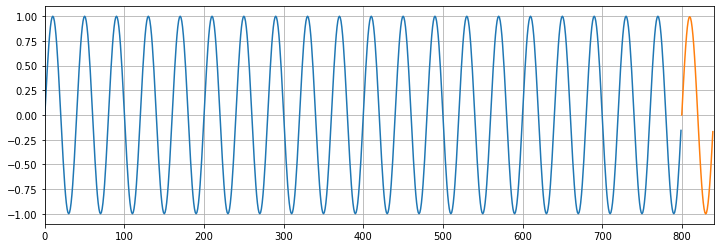

In [75]:
plt.figure(figsize=(12,4))
plt.xlim(0,841)
plt.grid(True)
plt.plot(y.numpy())
#plotting forecast
plt.plot(range(800,800+future), preds[window_size:])
plt.show()